# Time Series Forecasting using ARIMA and SARIMAX

In [2]:
#basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#Stationarity
from statsmodels.tsa.stattools import adfuller

In [3]:
#importing data
data = pd.read_csv('perrin-freres-monthly-champagne.csv')

In [4]:
data.head(10)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [5]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
data.columns = ['Month','Sales']
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
#dropping last two rows
data.drop(106, axis=0, inplace=True)
data.drop(105, axis=0, inplace=True)

In [8]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
#converting Month into datetime format which is in String format by default
data.Month = pd.to_datetime(data['Month'])

In [10]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [11]:
#removing the indices
data.set_index('Month', inplace=True)

In [12]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


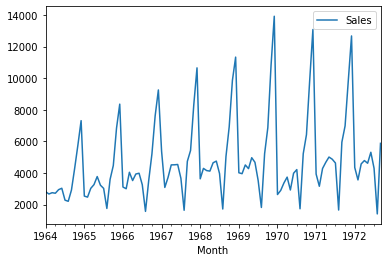

In [14]:
data.plot()

## Stationarity <br>
**Stationarity** in time series forecasting means that the statiscal properties of the process do not change over time or in simple words, if a shift in time does not cause a change in the shape of distribution. Basic properties of distribution like the mean, variance, and covariance are constant overtime. <br>
<br>
**Dickey-Fuller test**
A Dickey-Fuller test is a unit root test that tests the mull hypothesis that α=1 in the following model equation. alpha is the coefficient of the first lag on Y.<br>
Null Hypothesis (H0): alpha=1<br>
<br>
![](equation_2.png)<br>
where,

y(t-1) = lag 1 of time series <br>
delta Y(t-1) = first difference of the series at time (t-1)
<br>
<br>**Augmented Dickey-Fuller(ADF) test**<br>
The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.<br>
![](equation_3.png)<br>
we have only added more differencing terms, while the rest of the equation remains the same. This adds more thoroughness to the test.<br>

The null hypothesis however is still the same as the Dickey Fuller test.<br>

In [15]:
#testing for Stationarity
test_result = adfuller(data['Sales'])

The statsmodel package provides a reliable implementation of the ADF test via the adfuller() function in *statsmodels.tsa.stattools*. It returns the following outputs:<br>

1. The p-value<br>
2. The value of the test statistic<br>
3. Number of lags considered for the test<br>
4. The critical value cutoffs.<br>

In our model we are taking following hypothesis:<br>
H0: It is not stationary <br>
H1: It is stationary

In [16]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics', 'p-value', 'lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+ ': '+ str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak eveidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")

In [17]:
adfuller_test(data['Sales'])

ADF Test Statistics: -1.8335930563276297
p-value: 0.3639157716602417
lags Used: 11
Number of observations Used: 93
Weak eveidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


# Differencing<br>

**Differencing** is a method of transforming a time series dataset.It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.<br>

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.<br>

Differencing is performed by subtracting the previous observation from the current observation.

In [18]:
data['Sales First difference'] = data['Sales'] - data['Sales'].shift(1)

In [19]:
data.head()

,Sales,Sales First difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


**Differencing to remove Seasonality** <br>
Seasonal variation, or seasonality, are cycles that repeat regularly over time.
<br>
A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.

In [20]:
data['Seasonal First Difference'] = data['Sales'] - data['Sales'].shift(12)

In [21]:
data.head(15)

,Sales,Sales First difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [22]:
data.tail(10)

,Sales,Sales First difference,Seasonal First Difference
Month,,,
1971-12-01,12670.0,2819.0,-406.0
1972-01-01,4348.0,-8322.0,414.0
1972-02-01,3564.0,-784.0,402.0
1972-03-01,4577.0,1013.0,291.0
1972-04-01,4788.0,211.0,112.0
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0
1972-08-01,1413.0,-2885.0,-246.0


In [31]:
#Checking the data gain for statioarity
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistics: -7.626619157213163
p-value: 2.060579696813685e-11
lags Used: 0
Number of observations Used: 92
Strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


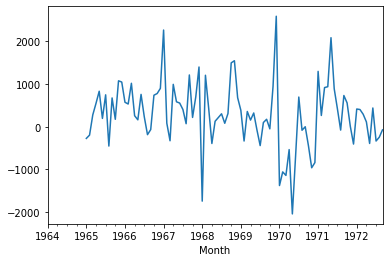

In [30]:
data['Seasonal First Difference'].plot()

# Auto Regressive Model <br>

**Auto Regression** is a linear regression model that uses lagged variables as input variables. <br>


AR model is used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.The process is basically a linear regression of the data in the current series against one or more past values in the same series.<br>

## AR(p) = δ + φ1yt-1 + φ2yt-2 + … + φpyt-1 + At
<br>
where,<br>
a. yt-1, yt-2…yt-p are the past series values (lags), <br>
b. At is white noise (i.e. randomness)<br>

We denote it as AR(p), where “p” is called the order of the model and represents the number of lagged values we want to include.<br>

Identification of Auto Regression model is best done by with the **Partial Autocorrelation**. <br>

## Partial Autocorrealation 
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.<br>
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.<br>

## Intuition of PACF for AR 
As we know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. For an AR model, the theoretical PACF "shuts off" past the order of the model. The phrase "shuts off" here means that in theory the partial autocorrelations are equal to 0 beyond that point.<br>
Putting it another way, the number of non-zero partial autocorrelations gives the order(p) of the AR model. Order of AR model means the most extreme lag of x that is used as a predictor.<br>

# Moving Average

A **moving average** is a technique to get an overall idea of the trends in a data set; it is an average of any subset of numbers (the average is calculated several times for several subsets of data). For example, if you want a two-year moving average for a data set from 2000, 2001, 2002 and 2003 you would find averages for the subsets 2000/2001, 2001/2002 and 2002/2003. <br>
This method is by far the easiest and it consists of making the arithmethic mean of the last 'n' observations contained by the time series to forecast the next observation. <br>
Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series. <br>
<br>
Identification of an MA model is best done with **Autocorrelation** rather that partial autocorrelation.
<br>

## Autocorrealation 
Statistical Correlation summarizes the strength of the relationship between two variables.We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.<br>

## Intuition of ACF for MA 
As we know the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. The ACF gives a clearer pattern for an MA. The ACF will have non-zero correaltions only at lags involved in the model. 

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

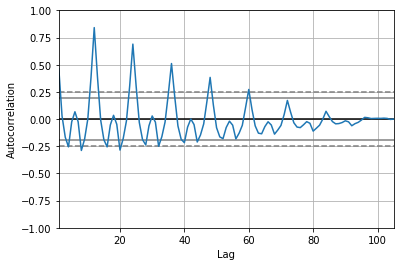

In [74]:
autocorrelation_plot(data['Sales'])
plt.show()

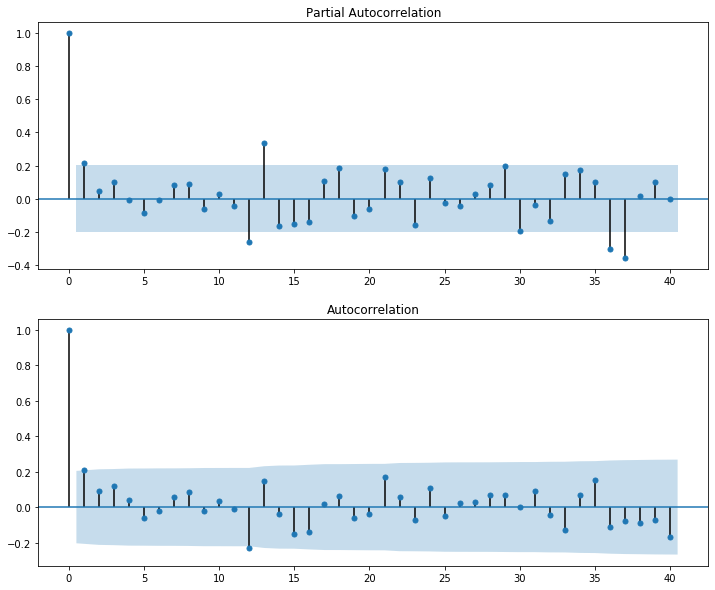

In [49]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:], lags=40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

## ARIMA Model

In [52]:
#Arima is generally used for non seasonal data but for purpose of understanding we are using ARIMA for seasonal data.
from statsmodels.tsa.arima_model import ARIMA

In [53]:
#order is (p,d,q)
model = ARIMA(data['Sales'], order=(1,1,1))
model_fit = model.fit()

C:\Users\anupam.ratan.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\anupam.ratan.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 25 Jul 2020   AIC                           1910.251
Time:                        22:20:26   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7829     12.405      1.837      0.069      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

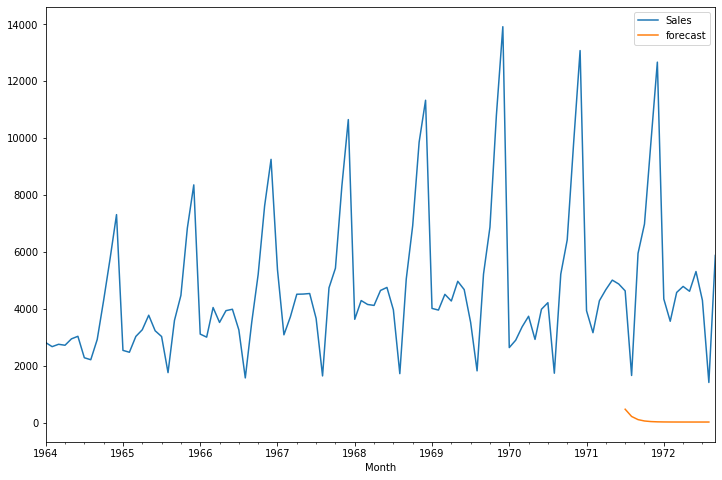

In [55]:
data['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
data[['Sales', 'forecast']].plot(figsize=(12,8))

## SARIMAX (Seasonal ARIMA)

In [58]:
import statsmodels.api as sm

In [60]:
model = sm.tsa.statespace.SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_s = model.fit()

C:\Users\anupam.ratan.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


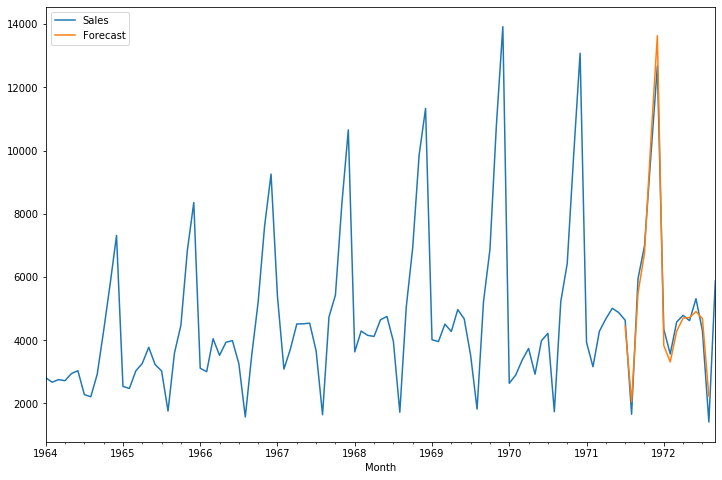

In [61]:
data['Forecast'] = model_s.predict(start=90, end=103, dynamic=True)
data[['Sales', 'Forecast']].plot(figsize=(12,8))

In [63]:
# Now we will see how our model will work with future forecast. For this we will be creating an dataset 
# for 24 months using pandas.

from pandas.tseries.offsets import DateOffset
future_dates = [data.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [66]:
future_data = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [68]:
future_data.tail()

,Sales,Sales First difference,Seasonal First Difference,forecast,Forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [69]:
future_dataset = pd.concat([data, future_data])

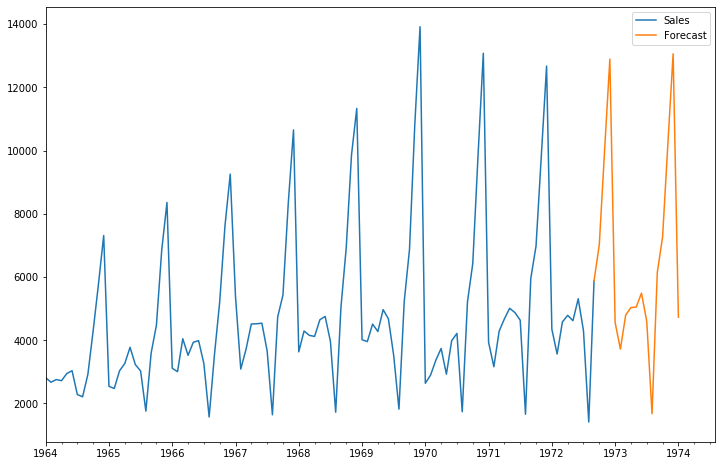

In [71]:
future_dataset['Forecast'] = model_s.predict(start=104, end=120, dynamic=True)
future_dataset[['Sales', 'Forecast']].plot(figsize=(12,8))